# Figure 6

The code in this notebook was last tested with:

* python version 3.7.12
* numpy 1.20.3
* pandas 1.3.5
* matplotlib 3.4.2
* scipy 1.7.0
* seaborn 0.11.1

Below we generate Figure 6.

In [1]:
import numpy as np
from scipy.stats import t
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style('ticks')
sns.set_context('talk')

In [3]:
red = sns.xkcd_rgb['pale red']
gre = sns.xkcd_rgb['light green'] 

In [4]:
data = pd.read_csv('data/Figure_6_data.csv', nrows=1001)
data

,generation,par_fixed,pro_fixed,par_fixed_std,pro_fixed_std,par_nmuts,pro_nmuts,par_nmuts_std,pro_nmuts_std
0,0,5.00,0.00,0.000000,0.000000,225.000000,225.300000,0.000000,1.571623
1,1,5.00,0.00,0.000000,0.000000,225.000633,225.307507,0.000775,1.576934
2,2,5.00,0.00,0.000000,0.000000,225.001647,225.380003,0.001335,1.563431
3,3,5.00,0.00,0.000000,0.000000,225.002303,225.411887,0.001730,1.586905
4,4,5.00,0.00,0.000000,0.000000,225.003147,225.482817,0.002483,1.659739
...,...,...,...,...,...,...,...,...,...
996,996,5.19,9.87,0.462493,0.364829,237.470843,444.763203,22.415091,15.607721
997,997,5.19,9.87,0.462493,0.364829,237.477370,444.768760,22.444828,15.599863
998,998,5.19,9.87,0.462493,0.364829,237.468970,444.754933,22.438763,15.618221
999,999,5.19,9.87,0.462493,0.364829,237.522823,444.758457,22.462172,15.610329


## Figure 6A

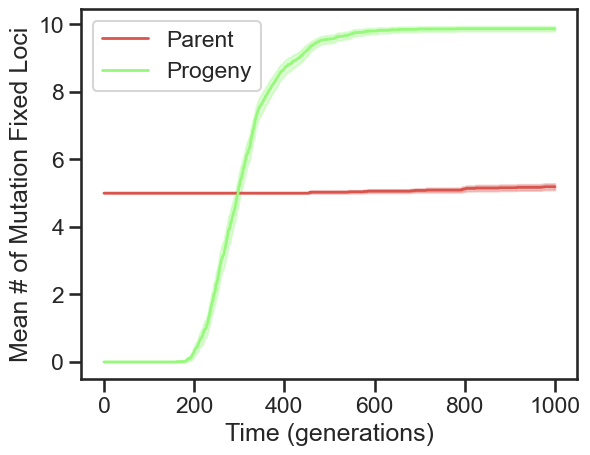

In [5]:
nReps = 100
f1 = data['par_fixed']
f2 = data['pro_fixed']
rv = t(nReps-1)
tq = rv.ppf(.975)
f1ci = tq * data['par_fixed_std'] / np.sqrt(nReps)
f2ci = tq * data['pro_fixed_std'] / np.sqrt(nReps)
plt.xlabel('Time (generations)')
plt.ylabel('Mean # of Mutation Fixed Loci')
plt.plot(data['generation'], f1, red, label='Parent',  linewidth=2.0)
plt.fill_between(data['generation'], f1 - f1ci, f1 + f1ci, alpha=0.3, color=red)
plt.plot(data['generation'], f2, gre, label='Progeny',  linewidth=2.0)
plt.fill_between(data['generation'], f2 - f2ci, f2 + f2ci, alpha=0.3, color=gre)
plt.legend(loc=2);

## Figure 6B

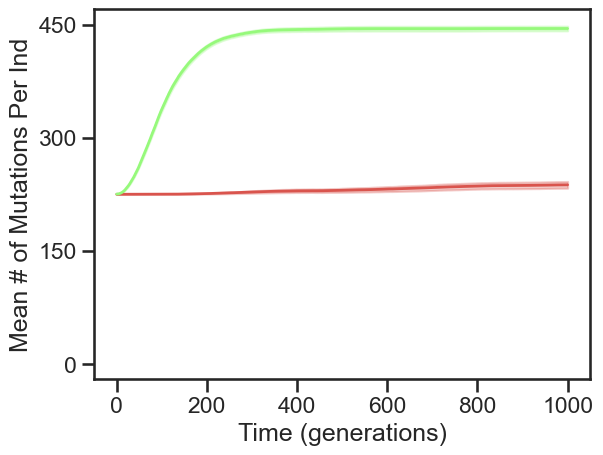

In [6]:
nReps = 100
m1 = data['par_nmuts']
m2 = data['pro_nmuts']
rv = t(nReps-1)
tq = rv.ppf(.975)
m1ci = tq * data['par_nmuts_std'] / np.sqrt(nReps)
m2ci = tq * data['pro_nmuts_std'] / np.sqrt(nReps)
plt.xlabel('Time (generations)')
plt.ylabel('Mean # of Mutations Per Ind')
plt.plot(data['generation'], m1, red, linewidth=2.0)
plt.fill_between(data['generation'], m1 - m1ci, m1 + m1ci, alpha=0.3, color=red)
plt.plot(data['generation'], m2, gre, linewidth=2.0)
plt.fill_between(data['generation'], m2 - m2ci, m2 + m2ci, alpha=0.3, color=gre)
plt.ylim(-20, 470)
plt.yticks([0, 150, 300, 450]);